In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel("/content/NEAR_token_transaction_data.xlsx")

In [ ]:
df.sample(10)

,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method
13359,0x3f7ed1fee9ce5479b23097c178ded8eb3e9403faab44...,19879225,1715822495,2024-05-16 01:21:35,0x6b75d8af000000e20b7a7ddf000ba900b4009a80,0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea,639.479829,-
18926,0x6d7b6ff634feb3ddca04605daf9e7bae3c17f0587cc2...,20133625,1718894783,2024-06-20 14:46:23,0x4ee9775db5c1e73ea170678c109ef079b2ad4811,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,226.916690,0x00000000
6366,0x4d3c83dc169c6e029d5e80c04bc991931f3c5504bf1c...,19536095,1711672139,2024-03-29 00:28:59,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,55.422535,0x415565b0
10708,0x96342f7d01e645a2d24a89a9d0cfbb75aa66effbbf29...,19777240,1714590107,2024-05-01 19:01:47,0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,814.165468,0x415565b0
10867,0x826b3594a62dd5657e887f4f0e68c50c67b18aba42a7...,19784718,1714680491,2024-05-02 20:08:11,0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea,0x6469b34a2a4723163c4902dbbdea728d20693c12,71.720786,-
16225,0x43c432229645d8a44e42c35bb61ae16c97fc3a197da4...,19995803,1717230827,2024-06-01 08:33:47,0xdef171fe48cf0115b1d80b88dc8eab59176fee57,0xb53b50536716a59d0b59b0964b14e24b80d3eda1,27.221435,Multi Swap
4095,0xa5dc022107eed19ea3d49a01071f15745928306c0075...,19433232,1710419111,2024-03-14 12:25:11,0x6469b34a2a4723163c4902dbbdea728d20693c12,0x9804eca2dd8994ad1b3720a390a1f81d99c6a3f5,1.267378,Sell To Uniswap
9108,0x9ecd0cc915c3d235f8bcb5cfd67eecdc619142b7a483...,19697582,1713627683,2024-04-20 15:41:23,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x1111111254eeb25477b68fb85ed929f73a960582,275.286386,Swap
901,0xf1fa7a0aeb30953974d6840eff85a50a77289b93baaf...,19009048,1705282631,2024-01-15 01:37:11,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0,0.053159,0x415565b0
13784,0x2ddbb7627addac0ce1791798da8ba93c4c2a5f2cd3b7...,19892496,1715982851,2024-05-17 21:54:11,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,248.569799,0x415565b0


In [ ]:
df.shape

(19836, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19836 entries, 0 to 19835
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction Hash  19836 non-null  object        
 1   Blockno           19836 non-null  int64         
 2   UnixTimestamp     19836 non-null  int64         
 3   DateTime (UTC)    19836 non-null  datetime64[ns]
 4   From              19836 non-null  object        
 5   To                19836 non-null  object        
 6   Quantity          19836 non-null  float64       
 7   Method            19836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 1.2+ MB


In [ ]:
df.columns

Index(['Transaction Hash', 'Blockno', 'UnixTimestamp', 'DateTime (UTC)',
       'From', 'To', 'Quantity', 'Method'],
      dtype='object')

In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Blockno,19836.0,19684408.376084,18909018.0,19465974.0,19736657.5,19937545.0,20171862.0,322060.528145
UnixTimestamp,19836.0,1713462542.953418,1704068735.0,1710817115.0,1714099703.0,1716527195.0,1719356675.0,3898955.715296
DateTime (UTC),19836,2024-04-18 17:49:02.953417984,2024-01-01 00:25:35,2024-03-19 02:58:35,2024-04-26 02:48:23,2024-05-24 05:06:35,2024-06-25 23:04:35,NaN
Quantity,19836.0,377.944387,0.0,3.21358,72.444861,293.678666,750000.0,8007.345063


In [ ]:
df.isna().sum()

,0
Transaction Hash,0
Blockno,0
UnixTimestamp,0
DateTime (UTC),0
From,0
To,0
Quantity,0
Method,0


In [ ]:
df.duplicated().sum()

7

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.duplicated().sum().any()

False

In [ ]:
col = df.columns

In [ ]:
for i in col:
  print(i,df[i].nunique())

Transaction Hash 9787
Blockno 8427
UnixTimestamp 8427
DateTime (UTC) 8427
From 1823
To 3273
Quantity 13329
Method 88


In [ ]:
df['Method'].value_counts()

,count
Method,
Swap,9427
0x415565b0,3281
-,2562
Execute,1030
Sell To Uniswap,759
...,...
Withdraw,1
Buy On Uniswap V2Fork,1
Fill Order,1


In [ ]:
df[df["Method"] == "-"]

,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method
17,0xcbdf5829343c8c9e4e5d550fe33ad30f65bd3cbe5f4b...,18912572,1704111995,2024-01-01 12:26:35,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0xa6381631e0634e97e23a80a3c57f9582aa959e16,688.722579,-
18,0xcbdf5829343c8c9e4e5d550fe33ad30f65bd3cbe5f4b...,18912572,1704111995,2024-01-01 12:26:35,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0,0.518486,-
22,0x8dfe34096162408e7a8ab9327d77a34a9cd1548c3582...,18912572,1704111995,2024-01-01 12:26:35,0xa6381631e0634e97e23a80a3c57f9582aa959e16,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,688.722579,-
23,0xfc9c8f973df31951d03dfaca3a08dec4c5ab540c6eac...,18912669,1704113195,2024-01-01 12:46:35,0x6469b34a2a4723163c4902dbbdea728d20693c12,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,689.054661,-
26,0x9a57adfe813708c9180b14dabcc08ab1dcc55505d7fe...,18912669,1704113195,2024-01-01 12:46:35,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x6469b34a2a4723163c4902dbbdea728d20693c12,701.284301,-
...,...,...,...,...,...,...,...,...
19803,0x1006c157a9fa8090ac55211caccb84d8675a8ccd10ab...,20170530,1719340607,2024-06-25 18:36:47,0x8d8404f8cca4c8834ca3cab1e54887ae47724bee,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,232.050000,-
19804,0x1006c157a9fa8090ac55211caccb84d8675a8ccd10ab...,20170530,1719340607,2024-06-25 18:36:47,0x8d8404f8cca4c8834ca3cab1e54887ae47724bee,0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea,232.050000,-
19819,0xb7e518331240b801ecb7e0aec18fded73fcd9cb87b0e...,20171393,1719351035,2024-06-25 21:30:35,0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea,0x5b93d80da1a359340d1f339fb574bdc56763f995,55.349356,-
19820,0xb7e518331240b801ecb7e0aec18fded73fcd9cb87b0e...,20171393,1719351035,2024-06-25 21:30:35,0x5b93d80da1a359340d1f339fb574bdc56763f995,0xdd66ca5783bc6cda04d73ded6bf692f5d3a03d8d,55.349356,-


In [ ]:
## Replacing "-" value with "Unknown"

df["Method"] = df["Method"].apply(lambda x: x.replace("-","Unknown"))

In [ ]:
df[df["Method"] == "Unknown"]

,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method
17,0xcbdf5829343c8c9e4e5d550fe33ad30f65bd3cbe5f4b...,18912572,1704111995,2024-01-01 12:26:35,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0xa6381631e0634e97e23a80a3c57f9582aa959e16,688.722579,Unknown
18,0xcbdf5829343c8c9e4e5d550fe33ad30f65bd3cbe5f4b...,18912572,1704111995,2024-01-01 12:26:35,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0,0.518486,Unknown
22,0x8dfe34096162408e7a8ab9327d77a34a9cd1548c3582...,18912572,1704111995,2024-01-01 12:26:35,0xa6381631e0634e97e23a80a3c57f9582aa959e16,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,688.722579,Unknown
23,0xfc9c8f973df31951d03dfaca3a08dec4c5ab540c6eac...,18912669,1704113195,2024-01-01 12:46:35,0x6469b34a2a4723163c4902dbbdea728d20693c12,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,689.054661,Unknown
26,0x9a57adfe813708c9180b14dabcc08ab1dcc55505d7fe...,18912669,1704113195,2024-01-01 12:46:35,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x6469b34a2a4723163c4902dbbdea728d20693c12,701.284301,Unknown
...,...,...,...,...,...,...,...,...
19803,0x1006c157a9fa8090ac55211caccb84d8675a8ccd10ab...,20170530,1719340607,2024-06-25 18:36:47,0x8d8404f8cca4c8834ca3cab1e54887ae47724bee,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,232.050000,Unknown
19804,0x1006c157a9fa8090ac55211caccb84d8675a8ccd10ab...,20170530,1719340607,2024-06-25 18:36:47,0x8d8404f8cca4c8834ca3cab1e54887ae47724bee,0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea,232.050000,Unknown
19819,0xb7e518331240b801ecb7e0aec18fded73fcd9cb87b0e...,20171393,1719351035,2024-06-25 21:30:35,0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea,0x5b93d80da1a359340d1f339fb574bdc56763f995,55.349356,Unknown
19820,0xb7e518331240b801ecb7e0aec18fded73fcd9cb87b0e...,20171393,1719351035,2024-06-25 21:30:35,0x5b93d80da1a359340d1f339fb574bdc56763f995,0xdd66ca5783bc6cda04d73ded6bf692f5d3a03d8d,55.349356,Unknown


# **EDA**

### **Quantity**

In [ ]:
import math

q1 = df["Quantity"].quantile(0.25)
q3 = df["Quantity"].quantile(0.75)

iqr = q3 - q1

lower_bound = max(0,q1 - 1.5 * iqr)

upper_bound = math.ceil(q3 + 1.5 * iqr)

print(f"Lower Bound: {lower_bound} \nUpper Bound: {upper_bound}")

Lower Bound: 0 
Upper Bound: 730


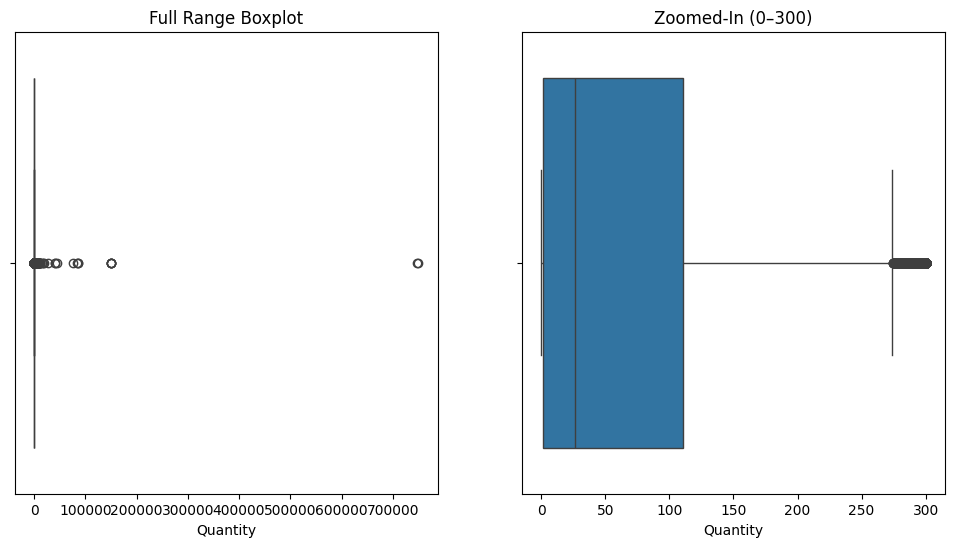

In [ ]:
plt.figure(figsize=(12, 6))

# Full range boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x = df["Quantity"])
plt.title('Full Range Boxplot')

# Zoomed-in boxplot for 75% data
plt.subplot(1, 2, 2)
sns.boxplot(x=df[df["Quantity"] <= 300]["Quantity"])
plt.title('Zoomed-In (0–300)')

plt.show()

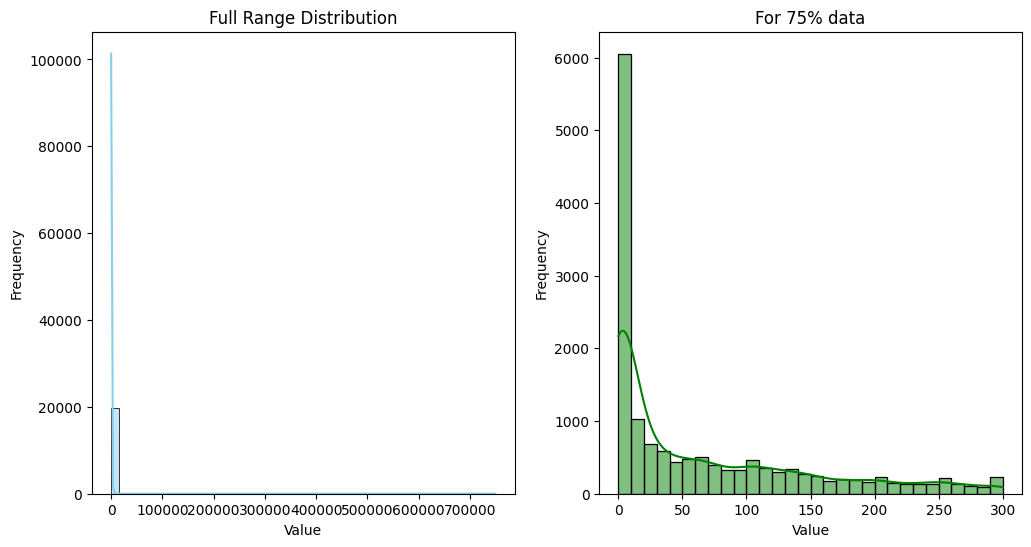

In [ ]:
plt.figure(figsize=(12, 6))

# Full range histogram
plt.subplot(1, 2, 1)
sns.histplot(x = df["Quantity"], bins=50, color='skyblue', edgecolor='black' , kde = True)
plt.title('Full Range Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Zoomed-in histogram for 75% data
plt.subplot(1, 2, 2)
sns.histplot(x=df[df["Quantity"] <= 300]["Quantity"], bins=30, color='green', kde=True)
plt.title('For 75% data')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()


**Outliers Analysis Using IQR**

In [ ]:
outliers = pd.DataFrame(df[(df["Quantity"] > upper_bound) | (df["Quantity"] < lower_bound)])

In [ ]:
outliers["Quantity"]

,Quantity
42,816.500000
48,810.034476
50,810.034476
76,991.532433
77,991.532433
...,...
19706,758.799883
19707,1720.940369
19712,746.305913
19815,746.300000


In [ ]:
print("Shape:",outliers.shape)
print("Minimum:",outliers["Quantity"].min())
print("Maximum",outliers["Quantity"].max())

Shape: (1686, 8)
Minimum: 731.0924444797905
Maximum 750000.0


**Outlier Analysis using Z-Score Method**

In [ ]:
from scipy.stats import zscore
df['Z-Score'] = zscore(df['Quantity'])
z_outliers = df[df['Z-Score'].abs() > 3]

In [ ]:
z_outliers["Quantity"]

,Quantity
1976,40000.000000
2034,40000.000000
6498,45200.000000
6649,26353.968605
14099,75170.000000
14108,84956.000000
14109,84956.000000
14110,84744.585000
14238,150000.000000
14239,150000.000000


In [ ]:
print("Shape:",z_outliers.shape)
print("Minimum:",z_outliers["Quantity"].min())
print("Maximum",z_outliers["Quantity"].max())

Shape: (15, 9)
Minimum: 26353.9686053412
Maximum 750000.0


### **Method**

In [ ]:
df["Method"].nunique()

88

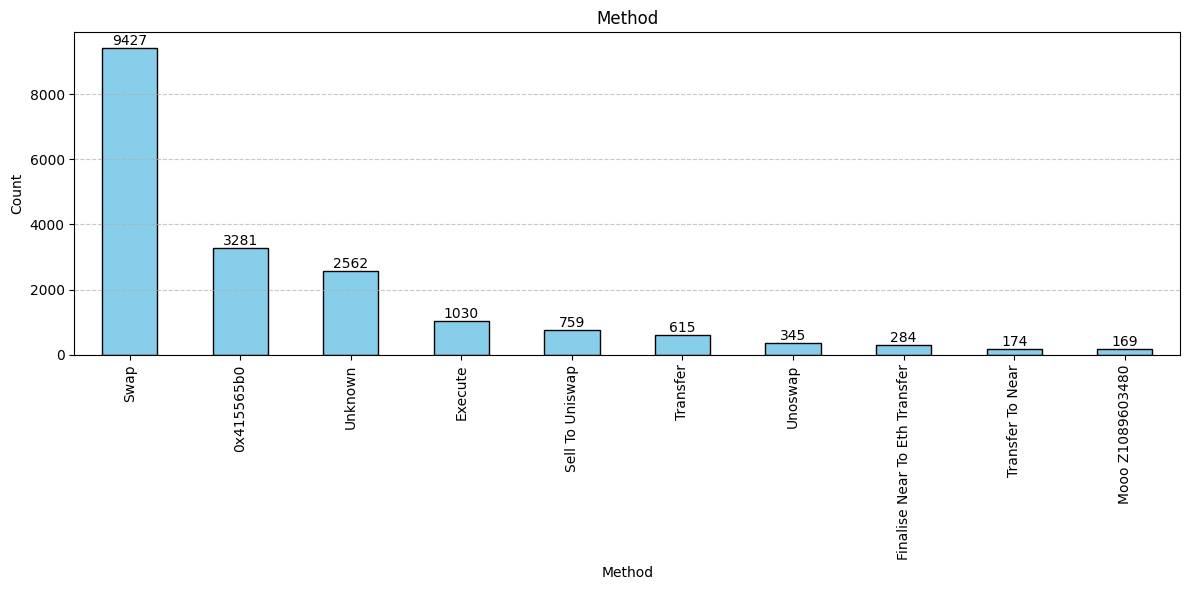

In [ ]:
plt.figure(figsize=(12, 6))
top_10 = df["Method"].value_counts().head(10)
top_10.plot(kind = "bar",color = "skyblue" , edgecolor = "k")
plt.title("Method")
plt.xlabel("Method")
plt.ylabel("Count")
for i, count in enumerate(top_10):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### **To column**

In [ ]:
###Check for the valid length of Ethereum Address

invalid_addresses = df[(df['To'].str.len() != 42)]
print("Invalid Ethereum Addresses:")
print(invalid_addresses)

Invalid Ethereum Addresses:
Empty DataFrame
Columns: [Transaction Hash, Blockno, UnixTimestamp, DateTime (UTC), From, To, Quantity, Method, Z-Score]
Index: []


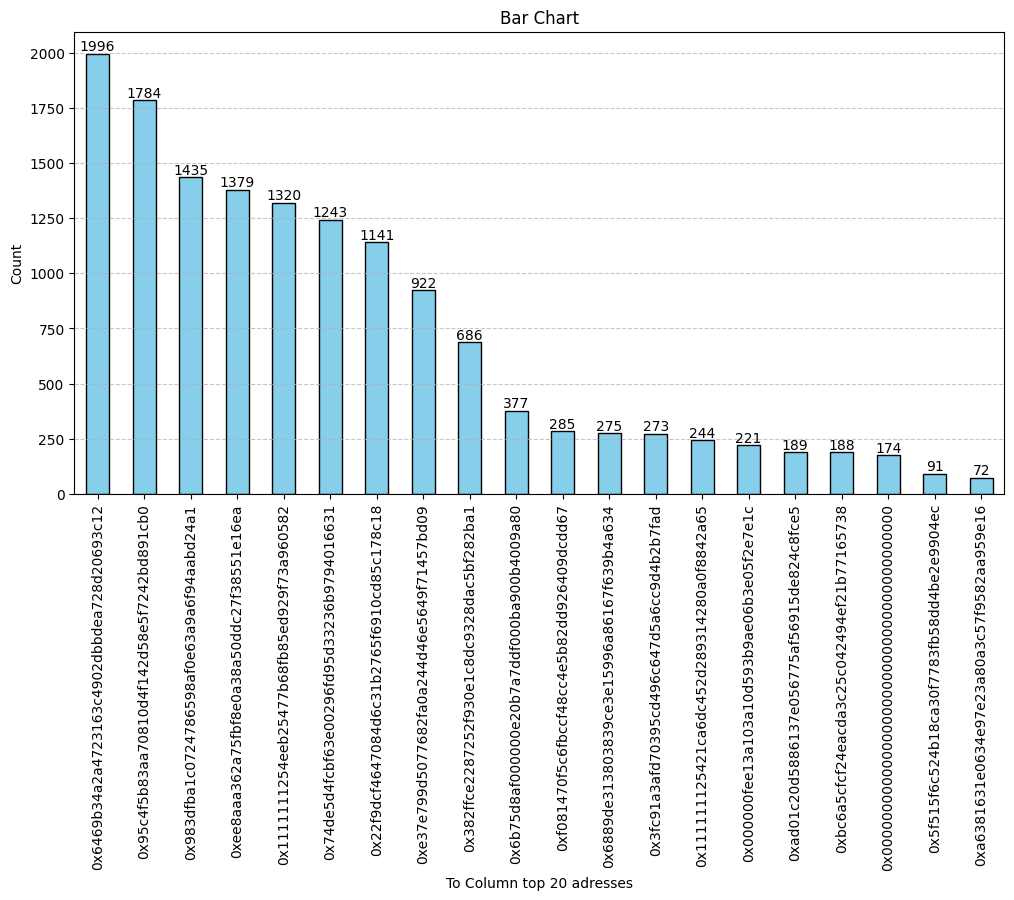

In [ ]:
plt.figure(figsize=(12, 6))
top_20_in_TO_col = df["To"].value_counts().head(20)
top_20_in_TO_col.plot(kind = "bar",color = "skyblue" , edgecolor = "k")
plt.title("Bar Chart")
plt.xlabel("To Column top 20 adresses")
plt.ylabel("Count")
for i, count in enumerate(top_20_in_TO_col):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **From column**

In [ ]:
### checking for the valid length of ethereum address
invalid_addresses = df[(df['From'].str.len() != 42)]
print("Invalid Ethereum Addresses:")
print(invalid_addresses)

Invalid Ethereum Addresses:
Empty DataFrame
Columns: [Transaction Hash, Blockno, UnixTimestamp, DateTime (UTC), From, To, Quantity, Method, Z-Score]
Index: []


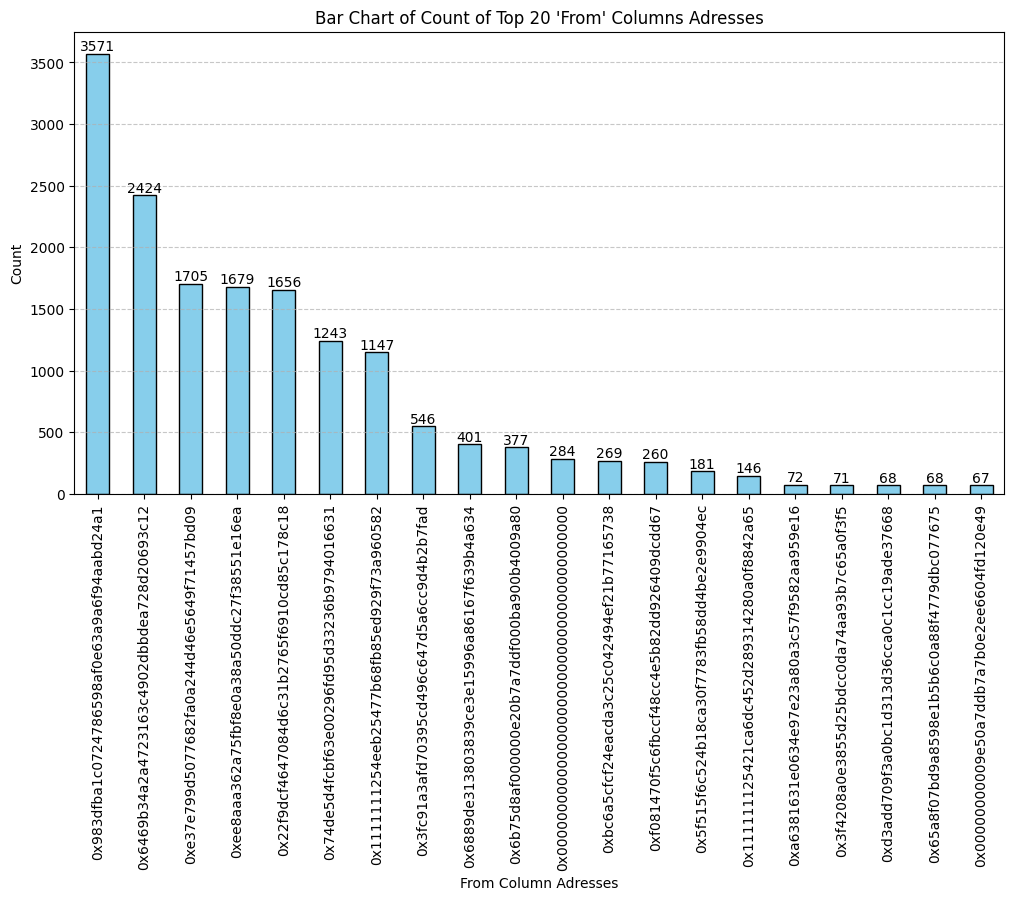

In [ ]:
plt.figure(figsize=(12, 6))
top_20_from_col = df["From"].value_counts().head(20)
top_20_from_col.plot(kind = "bar",color = "skyblue" , edgecolor = "k")
plt.title("Bar Chart of Count of Top 20 'From' Columns Adresses")
plt.xlabel("From Column Adresses")
plt.ylabel("Count")
for i, count in enumerate(top_20_from_col):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **Blockno**

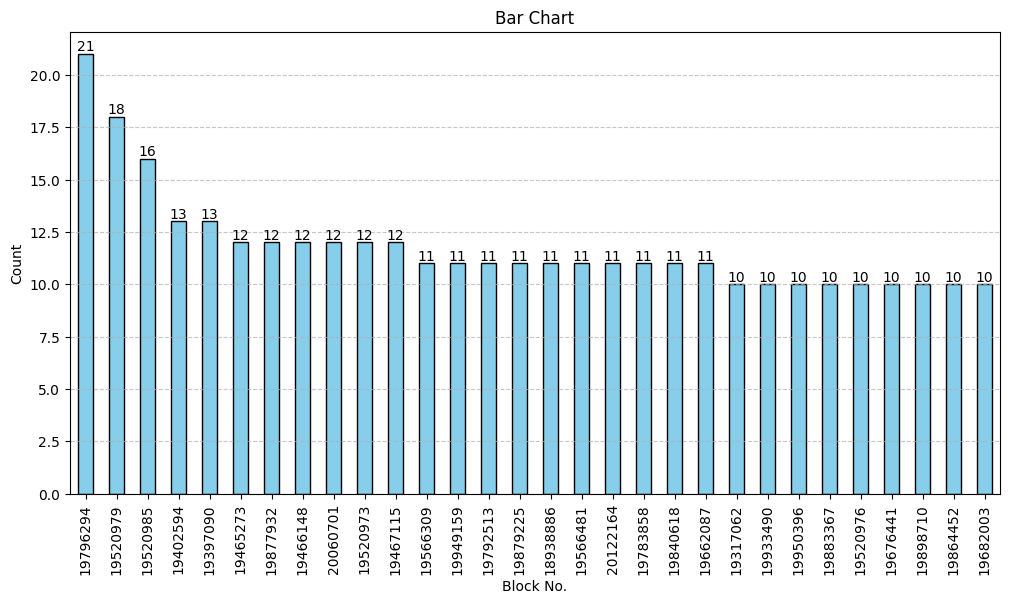

In [ ]:
plt.figure(figsize=(12, 6))
top_30_blocks = df["Blockno"].value_counts().head(30)
top_30_blocks.plot(kind = "bar",color = "skyblue" , edgecolor = "k")
plt.title("Bar Chart")
plt.xlabel("Block No.")
plt.ylabel("Count")
for i, count in enumerate(top_30_blocks):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **Transaction Hash**

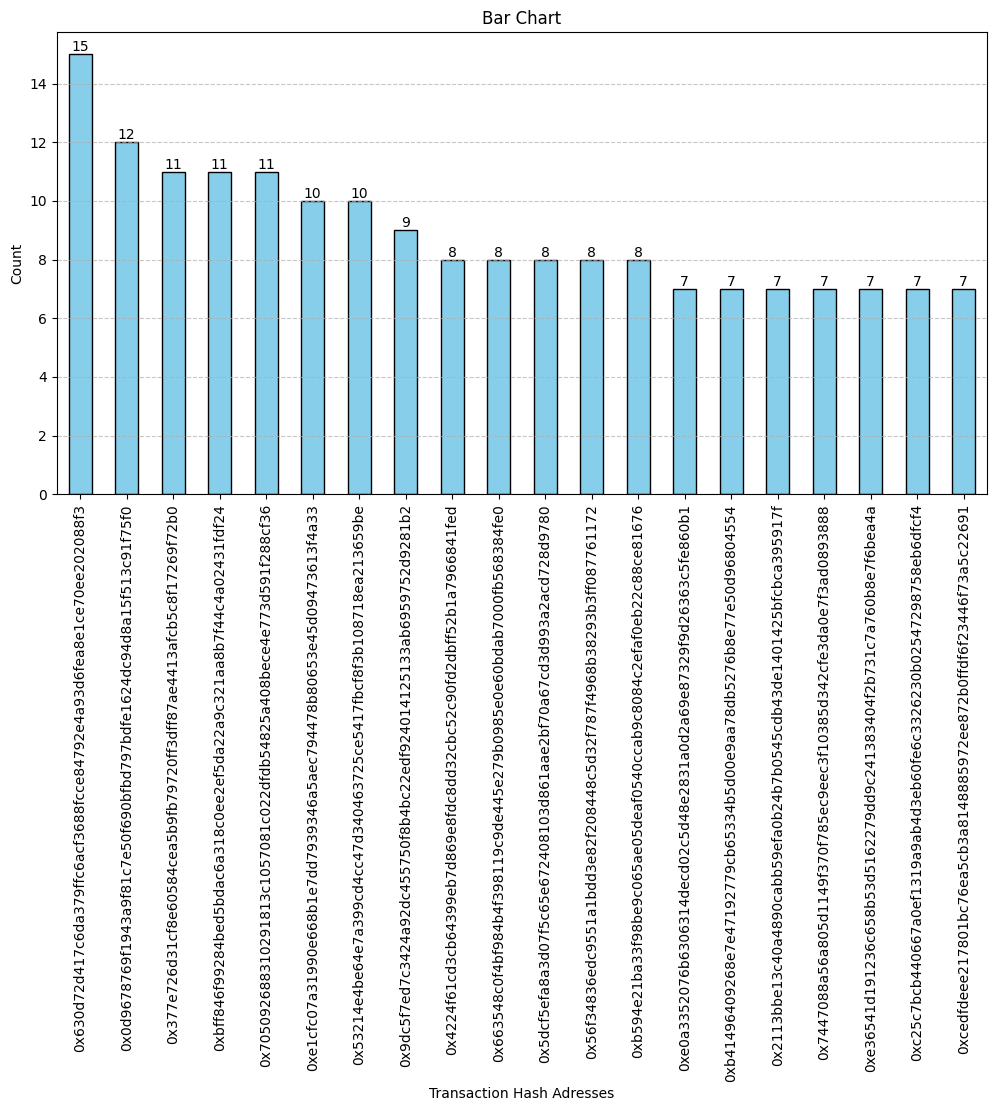

In [ ]:
plt.figure(figsize=(12, 6))
top_20_hash_transactions = df["Transaction Hash"].value_counts().head(20)
top_20_hash_transactions.plot(kind = "bar",color = "skyblue" , edgecolor = "k")
plt.title("Bar Chart")
plt.xlabel("Transaction Hash Adresses")
plt.ylabel("Count")
for i, count in enumerate(top_20_hash_transactions):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **Bivariate Analysis**

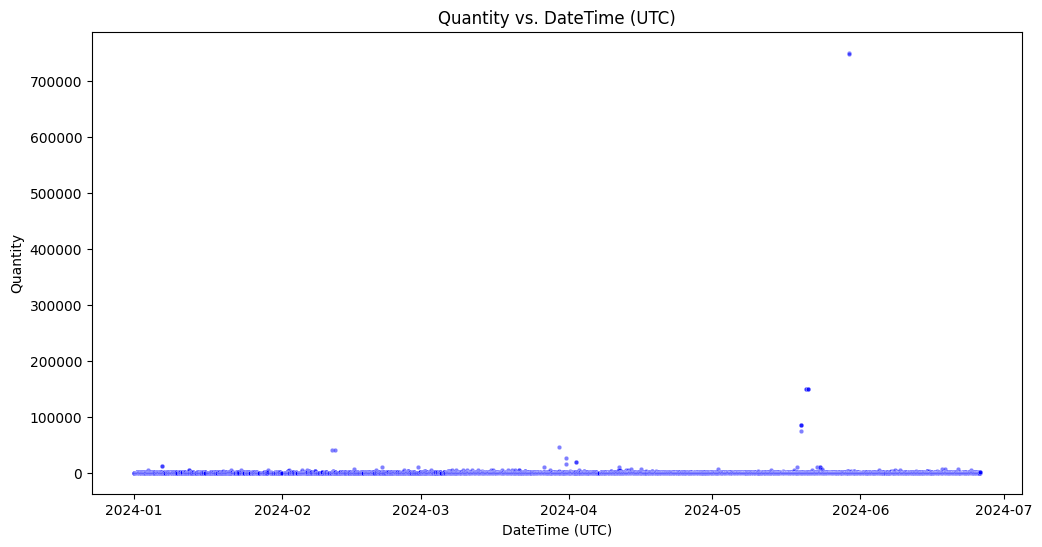

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x = df['DateTime (UTC)'], y =df['Quantity'], alpha=0.5, c='blue', s=10)
plt.title("Quantity vs. DateTime (UTC)")
plt.xlabel("DateTime (UTC)")
plt.ylabel("Quantity")
plt.show()

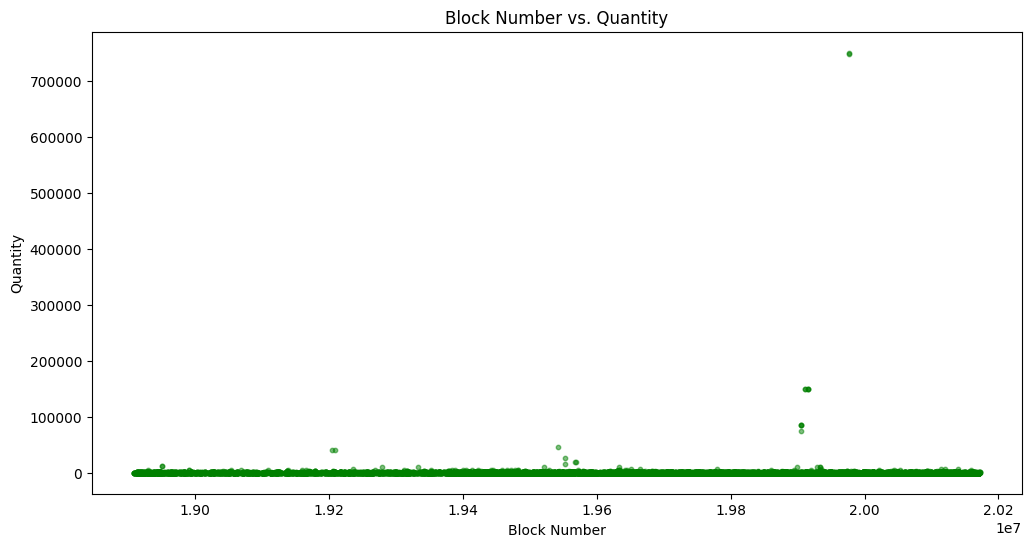

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Blockno'], df['Quantity'], alpha=0.5, c='green', s=10)
plt.title("Block Number vs. Quantity")
plt.xlabel("Block Number")
plt.ylabel("Quantity")
plt.show()


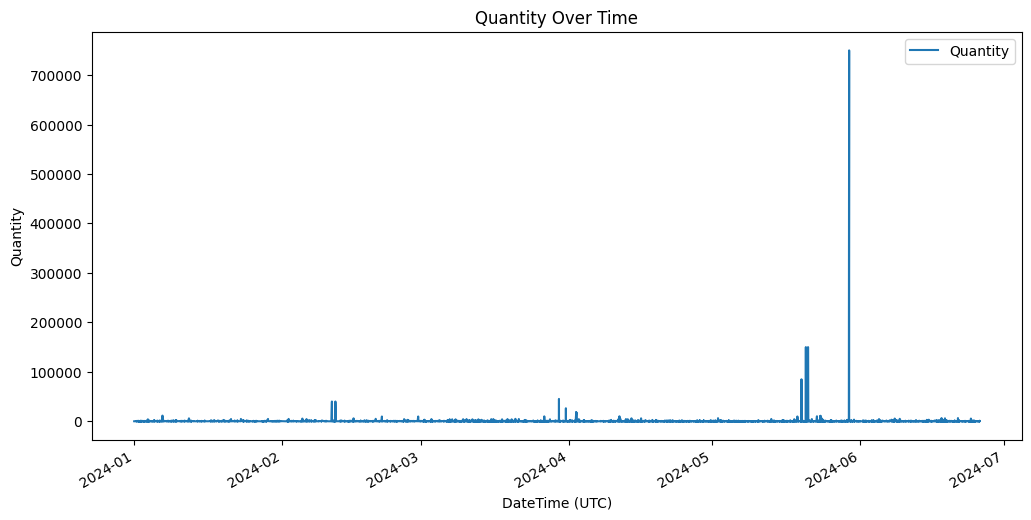

In [ ]:
df.sort_values('DateTime (UTC)').plot(x='DateTime (UTC)', y='Quantity', kind='line', figsize=(12, 6))
plt.title('Quantity Over Time')
plt.xlabel('DateTime (UTC)')
plt.ylabel('Quantity')
plt.show()


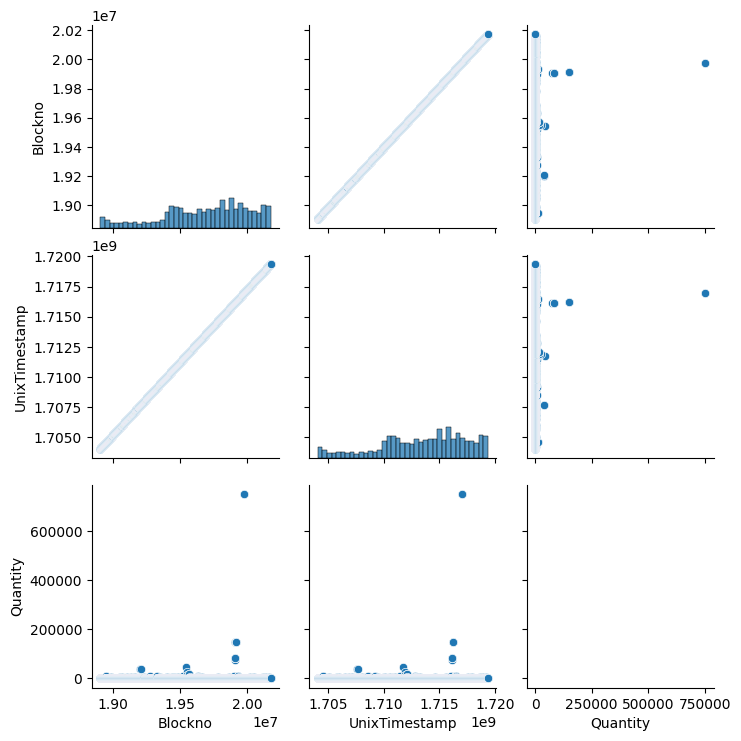

In [ ]:
sns.pairplot(df[['Blockno', 'UnixTimestamp', 'Quantity']])
plt.show()


# **Feature Engineering**

In [ ]:
data = df.copy()  ## making deep copy of df dataframe

In [ ]:
### Creating new features from DateTime column

def new_features_from_DateTime(df):
  data = df.assign(
    month=df["DateTime (UTC)"].dt.month,
    day=df["DateTime (UTC)"].dt.day,
    year=df["DateTime (UTC)"].dt.year,
    hour=df["DateTime (UTC)"].dt.hour,
    Day=df["DateTime (UTC)"].dt.day_name(),
    is_weekend=df["DateTime (UTC)"].dt.dayofweek >= 5
)
  return data


data = new_features_from_DateTime(df)
data.sample(5)


,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method,Z-Score,month,day,year,hour,Day,is_weekend
11900,0x0dcbed897b59940c737783075eba1a0b6bde8b27d106...,19816795,1715068079,2024-05-07 07:47:59,0x6b75d8af000000e20b7a7ddf000ba900b4009a80,0x6469b34a2a4723163c4902dbbdea728d20693c12,100.007361,Unknown,-0.034722,5,7,2024,7,Tuesday,False
1304,0xf842218724a113755f7de306d709ecf32b19c2d1936d...,19081386,1706158571,2024-01-25 04:56:11,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0x83733def20867172749a38a680c2c0e2fb39e770,186.656495,0x415565b0,-0.023902,1,25,2024,4,Thursday,False
1151,0x9c625431bb445ebb905a4a08afe005e229d7a0f1663f...,19054799,1705834835,2024-01-21 11:00:35,0xe37e799d5077682fa0a244d46e5649f71457bd09,0x6469b34a2a4723163c4902dbbdea728d20693c12,141.066281,Swap,-0.029595,1,21,2024,11,Sunday,True
664,0x27eeb01f4d14af94dd9eb0b82e5b849370d90d46574c...,18968256,1704789371,2024-01-09 08:36:11,0x6f7617a1208161f502bb381c36fedad5fd88b0bf,0x74de5d4fcbf63e00296fd95d33236b9794016631,0.887129,Swap,-0.047098,1,9,2024,8,Tuesday,False
14626,0xfd3425dd2d0a6dd554b3d577853a50a0b5fc27fae245...,19929225,1716426767,2024-05-23 01:12:47,0xbc6a5cfcf24eacda3c25c042494ef21b77165738,0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea,300.000000,Unoswap,-0.009749,5,23,2024,1,Thursday,False


In [ ]:
# Define bins and labels based on the statistics of quantity column
bins = [0, 3.21358, 72.444861, 293.678666, 1000 , float('inf')]  # Min, 25%, 50%, 75%, Max
labels = ["Very Low", "Low", "Medium", "High" , "Very High"]

# Create a new column for Quantity categories
data["Quantity Category"] = pd.cut(data["Quantity"], bins=bins, labels=labels)

# Check the distribution
print(data["Quantity Category"].value_counts())


Quantity Category
Medium       4959
Low          4956
Very Low     4947
High         4224
Very High     735
Name: count, dtype: int64


In [ ]:
# Flag high quantity transactions
data["High Quantity Flag"] = data["Quantity"] > 294  ### Here we take threshold as 75% quantile of the Quantity column

# Check if From and To addresses are the same (self-transaction)
data["Is Self Transaction"] = data["From"] == data["To"]


In [ ]:
data.sample(10)

,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method,Z-Score,month,day,year,hour,Day,is_weekend,Quantity Category,High Quantity Flag,Is Self Transaction
9200,0x757ab6a15282e188c078ae6ed229a73f9499102b55d6...,19700938,1713668135,2024-04-21 02:55:35,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0xec43e0bf91a70906d92e0ddb93f5a696ce56efcf,3.013551,0x415565b0,-0.046833,4,21,2024,2,Sunday,True,Very Low,False,False
1533,0xf2c1f301f1737f02ddd6ff13003890f1476ebc556e3d...,19121674,1706646119,2024-01-30 20:21:59,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0,0.601583,Unknown,-0.047134,1,30,2024,20,Tuesday,False,Very Low,False,False
16392,0xb594e21ba33f98be9c065ae05deaf0540ccab9c8084c...,20001904,1717304363,2024-06-02 04:59:23,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0,0.066338,Swap,-0.047201,6,2,2024,4,Sunday,True,Very Low,False,False
7667,0xb8024a9cef85f898a9376bde22291883ee0b66f4b15a...,19618567,1712671535,2024-04-09 14:05:35,0x111111125421ca6dc452d289314280a0f8842a65,0xbc6a5cfcf24eacda3c25c042494ef21b77165738,488.083601,Swap,0.013736,4,9,2024,14,Tuesday,False,High,True,False
10767,0xec76264f973aa1e7847a3a5dcf7792cf5c7dc216c427...,19779144,1714613099,2024-05-02 01:24:59,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea,155.865815,0x415565b0,-0.027747,5,2,2024,1,Thursday,False,Medium,False,False
12603,0xee731c84ec19d9cef7aac729a7d141b052794e245339...,19849947,1715468591,2024-05-11 23:03:11,0x89f0b1409574101f9502a3b503d3b47ca6dc5ba1,0x92098d25e1a64d3e1fc8fe5a7aadfef76aa05484,1243.928858,Transfer,0.108116,5,11,2024,23,Saturday,True,Very High,True,False
16262,0xe09916975c480375d8cc412e3d12c69bbc4859a41502...,19997370,1717249751,2024-06-01 13:49:11,0x6469b34a2a4723163c4902dbbdea728d20693c12,0xe37e799d5077682fa0a244d46e5649f71457bd09,72.880532,Swap,-0.038109,6,1,2024,13,Saturday,True,Medium,False,False
14734,0xfa1ad721a3715ad97004dad6c2d3db55fc71d8f7e3a7...,19933490,1716478247,2024-05-23 15:30:47,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0,1.207619,Unknown,-0.047058,5,23,2024,15,Thursday,False,Very Low,False,False
5734,0xe9ec6505a760de83b0727878ede937e359cdd98fe3d8...,19510977,1711363415,2024-03-25 10:43:35,0xa6381631e0634e97e23a80a3c57f9582aa959e16,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,793.838005,Unknown,0.051915,3,25,2024,10,Monday,False,High,True,False
17506,0x1783840f6ac889bb4eb8c1754f2e0901b4854ca01fae...,20065591,1718072759,2024-06-11 02:25:59,0xbc6a5cfcf24eacda3c25c042494ef21b77165738,0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea,500.000000,Unoswap,0.015224,6,11,2024,2,Tuesday,False,High,True,False


In [ ]:
# Flag outliers based on Z-Score (e.g., abs(Z-Score) > 3)
data["Is Outlier"] = data["Z-Score"].abs() > 3


In [ ]:
data["Log Quantity"] = np.log1p(data["Quantity"])   ## For Handle Skewness in the Quantity colummn

In [ ]:
# Count transactions per address
data["From Activity Count"] = data["From"].map(data["From"].value_counts())
data["To Activity Count"] = data["To"].map(data["To"].value_counts())

# Count unique addresses
print(data["From"].nunique())
print(data["To"].nunique())


1823
3273


In [ ]:
# Sort by wallet and DateTime
data = data.sort_values(by=["From", "DateTime (UTC)"])

# Cumulative sum of Quantity per wallet
data["Cumulative Quantity"] = data.groupby("From")["Quantity"].cumsum()


**Network analysis**

In [ ]:
import networkx as nx
import pandas as pd


In [ ]:
#Create a directed graph from the 'From' and 'To' columns
G = nx.DiGraph()

# Add edges with weights if required (e.g., using 'Quantity' as weight)
for index, row in data.iterrows():
    G.add_edge(row['From'], row['To'], weight=row['Quantity'])

# Calculate centralities
# Degree centrality
degree_centrality = nx.degree_centrality(G)

# Betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G, weight='weight')

# Closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Map centralities back to the DataFrame
# Create new columns in the DataFrame to store centrality measures for 'From' nodes
data['from_degree_centrality'] = data['From'].map(degree_centrality)
data['from_betweenness_centrality'] = data['From'].map(betweenness_centrality)
data['from_closeness_centrality'] = data['From'].map(closeness_centrality)

# Similarly, create columns for 'To' nodes
data['to_degree_centrality'] = data['To'].map(degree_centrality)
data['to_betweenness_centrality'] = data['To'].map(betweenness_centrality)
data['to_closeness_centrality'] = data['To'].map(closeness_centrality)



In [ ]:
import plotly.graph_objects as go
import networkx as nx

#  Create node positions for visualization
pos = nx.spring_layout(G)  # You can experiment with other layout algorithms

#  Create edge traces
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

#  Create node traces
node_x = []
node_y = []
node_text = []  # To display node information on hover
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(f"Address: {node}<br>Degree: {G.degree(node)}")
    # Customize hover text with relevant information

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    text=node_text,
    marker=dict(
        showscale=True,
        colorscale='YlGnBu', # Choose a colorscale
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

#  Color nodes based on degree centrality (or other metrics)
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append(f"Address: {adjacencies[0]}<br>Degree: {len(adjacencies[1])}") # Customize hover text

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

#  Create the figure and add traces
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='NEAR Token Transaction Network',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

fig.show()

**Analysis of data**

In [ ]:
data.sample(5)

,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method,Z-Score,month,...,Log Quantity,From Activity Count,To Activity Count,Cumulative Quantity,from_degree_centrality,from_betweenness_centrality,from_closeness_centrality,to_degree_centrality,to_betweenness_centrality,to_closeness_centrality
6728,0x2dc61f31dfbffb5d3903c5f5f454ff2911b05218090b...,19557549,1711932743,2024-04-01 00:52:23,0x6469b34a2a4723163c4902dbbdea728d20693c12,0x6b75d8af000000e20b7a7ddf000ba900b4009a80,292.892118,Unknown,-0.010637,4,...,5.683213,2424,377,129081.969193,0.302418,0.373287,0.234901,0.002276,0.000000,0.164490
9388,0x215ad425f2f7ff48b575df3fe16712d69c4cfdb16346...,19709744,1713774503,2024-04-22 08:28:23,0x74de5d4fcbf63e00296fd95d33236b9794016631,0x52e5466136448d0865c21b223616e6f0db9d975f,36.010124,Swap,-0.042713,4,...,3.611192,1243,1,98563.452319,0.234993,0.140243,0.205530,0.000569,0.000000,0.141320
2063,0x66be04222576005cc1280b5a60c0747fc19b9774eebb...,19216561,1707796715,2024-02-13 03:58:35,0xe37e799d5077682fa0a244d46e5649f71457bd09,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,1227.540000,Swap,0.106070,2,...,7.113582,1705,1435,28362.785502,0.096444,0.069457,0.213470,0.034708,0.019162,0.212838
13399,0xd7665e88bf1e31d65a0d233161951e66923e645101aa...,19880056,1715832527,2024-05-16 04:08:47,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,496.064244,0x415565b0,0.014733,5,...,6.208719,3571,1141,527978.372218,0.034708,0.019162,0.212838,0.235562,0.168209,0.209364
9234,0x82880ef3114be42c3d5befe4c92d620d3dcbac2d3afe...,19702878,1713691619,2024-04-21 09:26:59,0x6469b34a2a4723163c4902dbbdea728d20693c12,0x1111111254eeb25477b68fb85ed929f73a960582,3.118193,Swap,-0.046820,4,...,1.415415,2424,1320,154223.453799,0.302418,0.373287,0.234901,0.157610,0.066913,0.176537


In [ ]:
data.isnull().sum()

,0
Transaction Hash,0
Blockno,0
UnixTimestamp,0
DateTime (UTC),0
From,0
To,0
Quantity,0
Method,0
Z-Score,0
month,0


In [ ]:
data.describe()

,Blockno,UnixTimestamp,DateTime (UTC),Quantity,Z-Score,month,day,year,hour,Log Quantity,From Activity Count,To Activity Count,Cumulative Quantity,from_degree_centrality,from_betweenness_centrality,from_closeness_centrality,to_degree_centrality,to_betweenness_centrality,to_closeness_centrality
count,1.982900e+04,1.982900e+04,19829,19829.000000,1.982900e+04,19829.000000,19829.000000,19829.0,19829.000000,19829.000000,19829.000000,19829.000000,1.982900e+04,19829.000000,19829.000000,19829.000000,19829.000000,19829.000000,19829.000000
mean,1.968449e+07,1.713463e+09,2024-04-18 18:04:37.185889536,378.076434,7.166703e-18,4.092642,15.548590,2024.0,11.957386,3.754155,1557.523577,891.534974,1.713366e+05,0.107344,0.093251,0.190616,0.085831,0.074212,0.177432
min,1.890902e+07,1.704069e+09,2024-01-01 00:25:35,0.000000,-4.720908e-02,1.000000,1.000000,2024.0,0.000000,0.000000,1.000000,1.000000,0.000000e+00,0.000284,0.000000,0.000000,0.000284,0.000000,0.000000
25%,1.946602e+07,1.710818e+09,2024-03-19 03:07:35,3.214500,-4.680770e-02,3.000000,8.000000,2024.0,5.000000,1.438531,284.000000,21.000000,1.924989e+04,0.006543,0.002834,0.162960,0.000853,0.000000,0.144766
50%,1.973678e+07,1.714101e+09,2024-04-26 03:12:11,72.480398,-3.815871e-02,4.000000,16.000000,2024.0,13.000000,4.297019,1656.000000,1141.000000,1.308461e+05,0.070555,0.045942,0.209364,0.011949,0.019162,0.176537
75%,1.993754e+07,1.716527e+09,2024-05-24 05:06:35,293.707990,-1.053479e-02,5.000000,23.000000,2024.0,18.000000,5.685985,2424.000000,1435.000000,2.720136e+05,0.234993,0.140243,0.213470,0.157610,0.114195,0.212838
max,2.017186e+07,1.719357e+09,2024-06-25 23:04:35,750000.000000,9.360266e+01,6.000000,31.000000,2024.0,23.000000,13.527830,3571.000000,1996.000000,1.271448e+06,0.302418,0.373287,0.234901,0.302418,0.373287,0.234901
std,3.220912e+05,3.899327e+06,NaN,8008.755294,1.000025e+00,1.472990,8.428048,0.0,7.158446,2.335075,1223.679990,725.054807,1.728831e+05,0.106420,0.117655,0.042788,0.107410,0.113461,0.039462


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19829 entries, 13 to 10613
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Transaction Hash             19829 non-null  object        
 1   Blockno                      19829 non-null  int64         
 2   UnixTimestamp                19829 non-null  int64         
 3   DateTime (UTC)               19829 non-null  datetime64[ns]
 4   From                         19829 non-null  object        
 5   To                           19829 non-null  object        
 6   Quantity                     19829 non-null  float64       
 7   Method                       19829 non-null  object        
 8   Z-Score                      19829 non-null  float64       
 9   month                        19829 non-null  int32         
 10  day                          19829 non-null  int32         
 11  year                         19829 non-null  

 Distribution of transactions by method

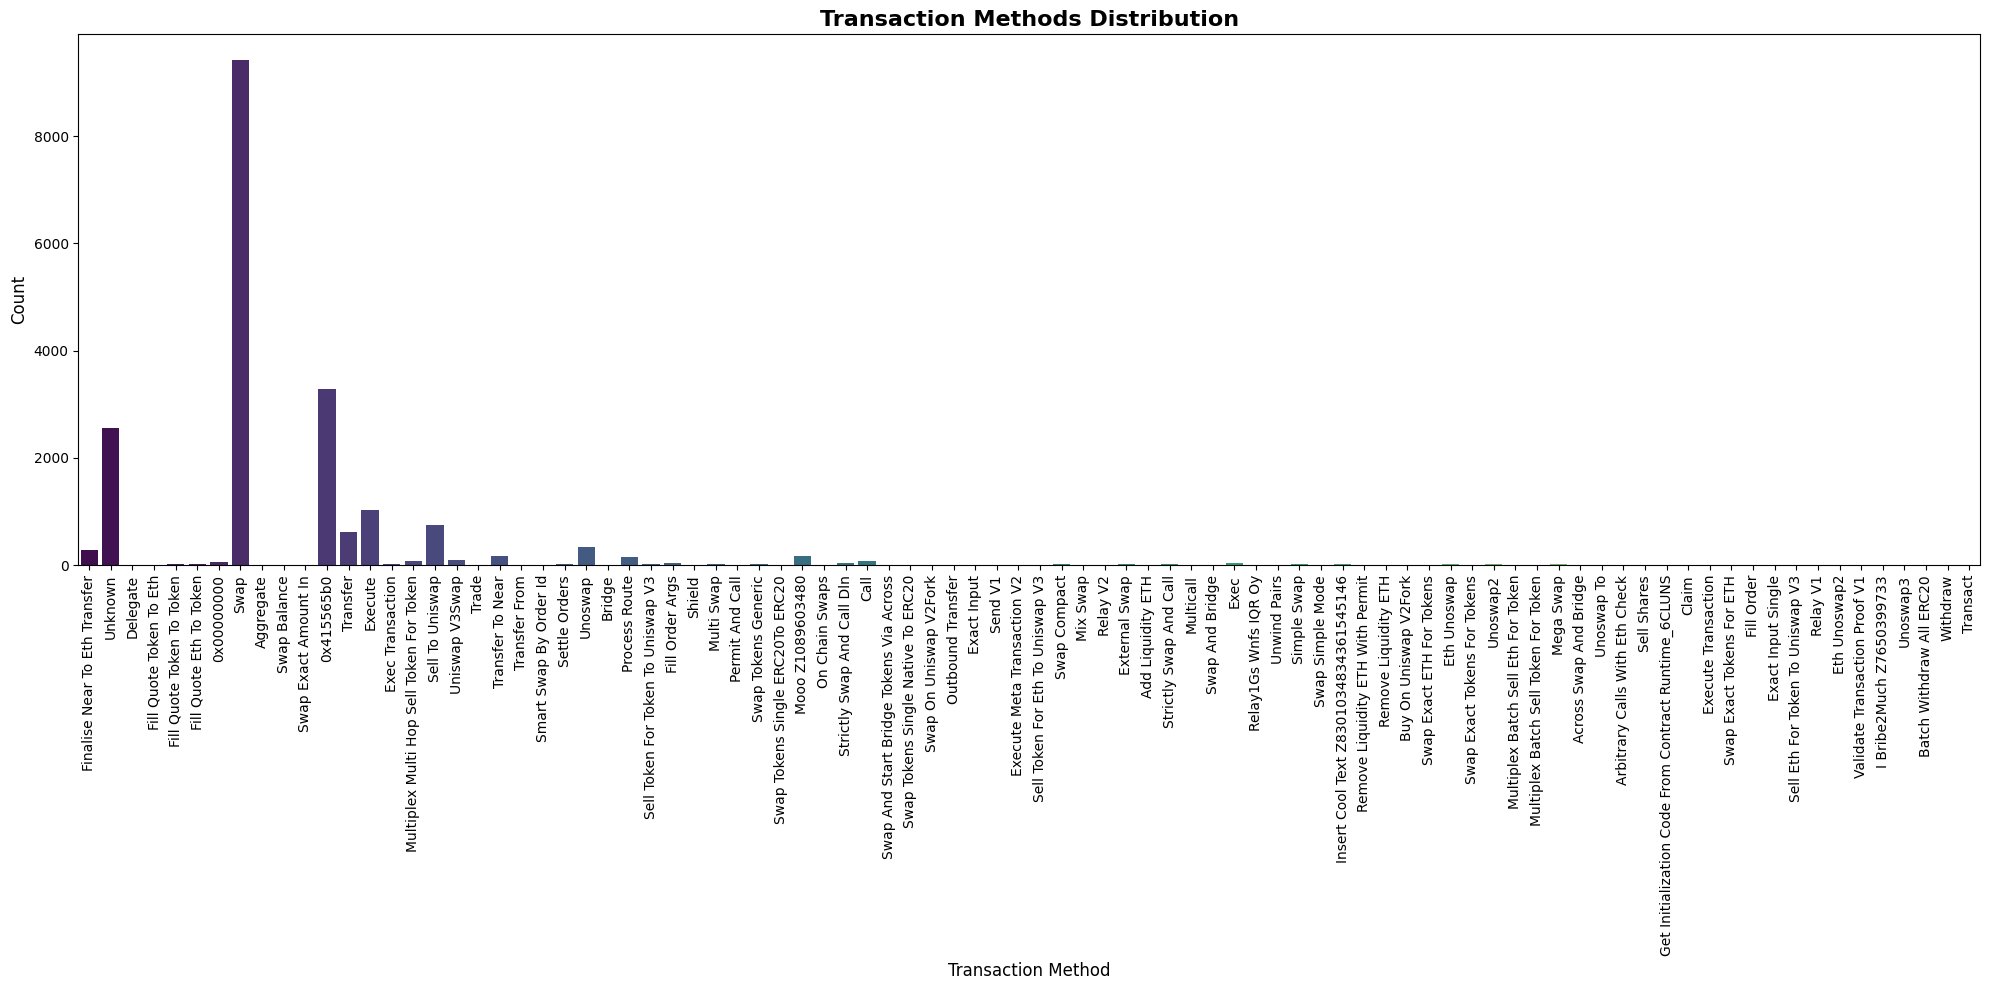

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(data=data, x='Method', palette='viridis')
plt.title('Transaction Methods Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Transaction Method', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

 Analyze quantity distribution

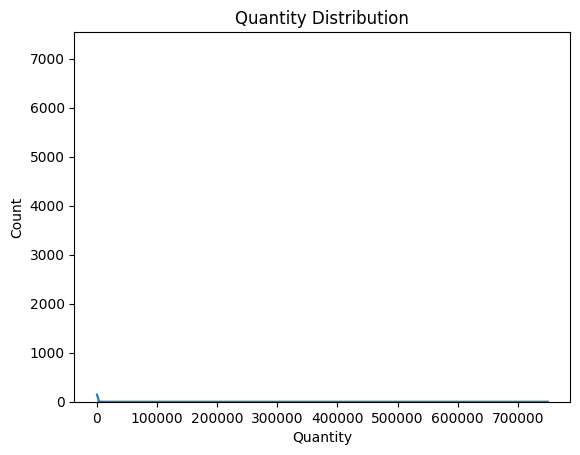

In [ ]:
sns.histplot(data=data, x='Quantity', kde=True)
plt.title('Quantity Distribution')
plt.show()

Correlation matrix

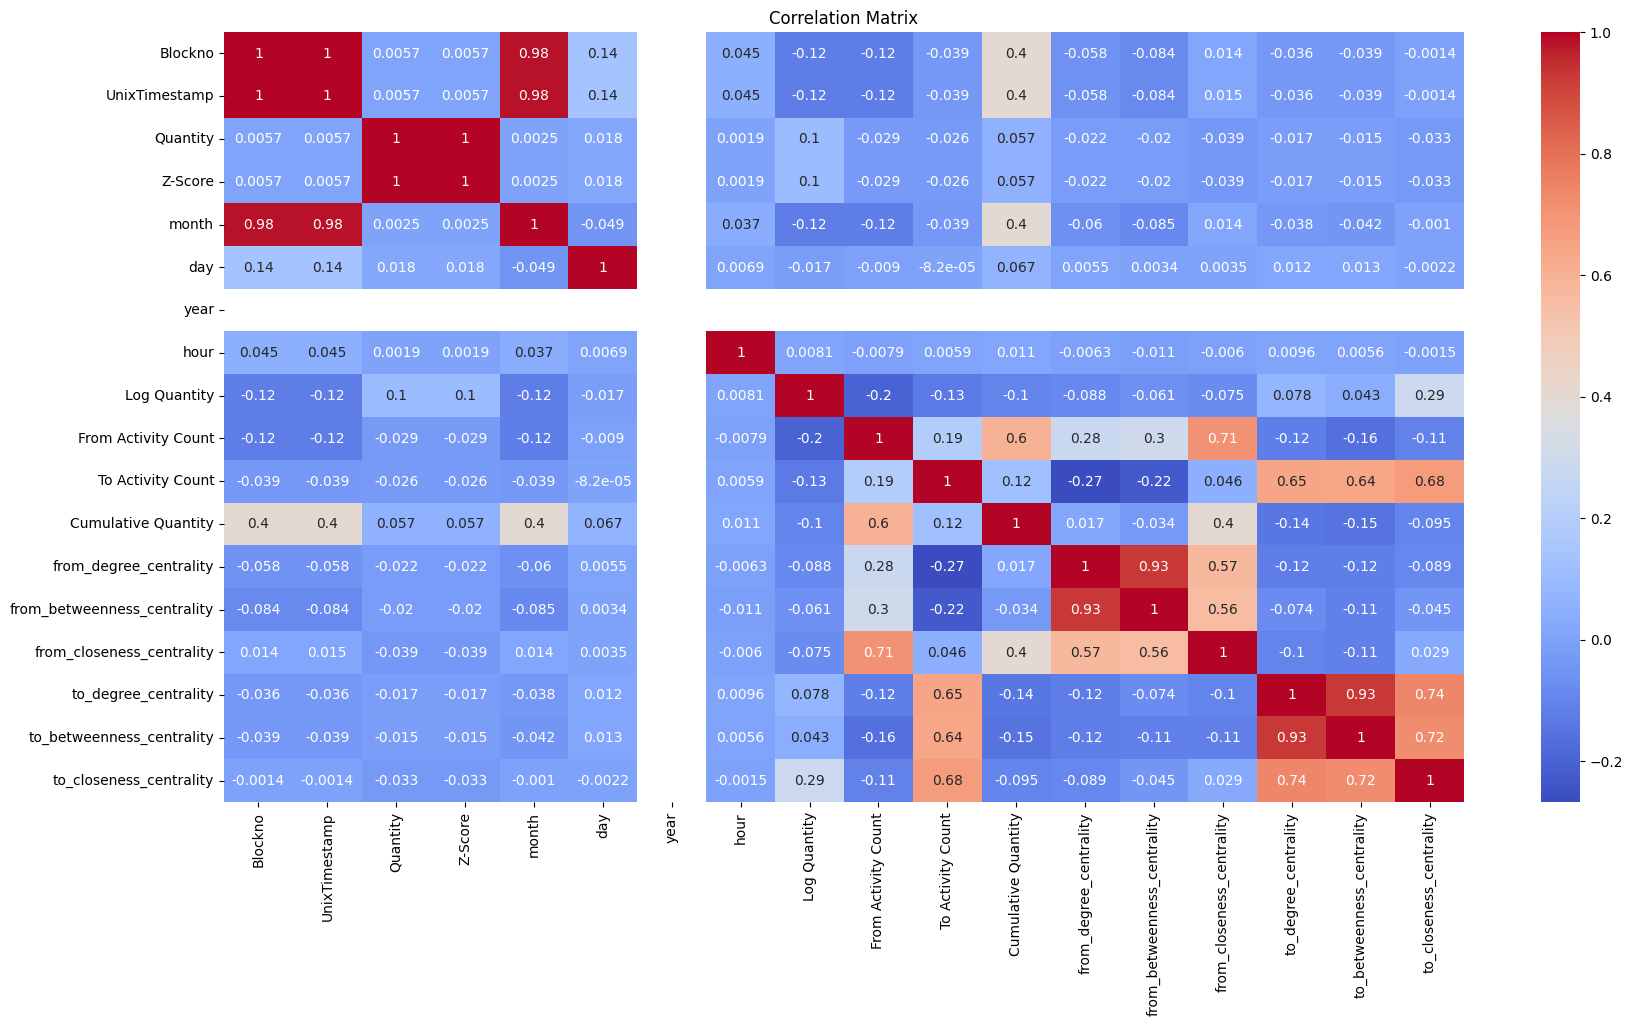

In [ ]:
numeric_data = data.select_dtypes(include=[np.number])
correlation = numeric_data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Analyze Z-Score for outliers

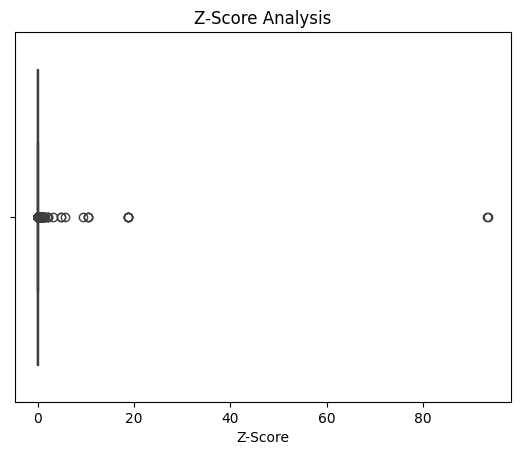

In [ ]:
sns.boxplot(data=data, x='Z-Score')
plt.title('Z-Score Analysis')
plt.show()

Group transactions by month , day and hour

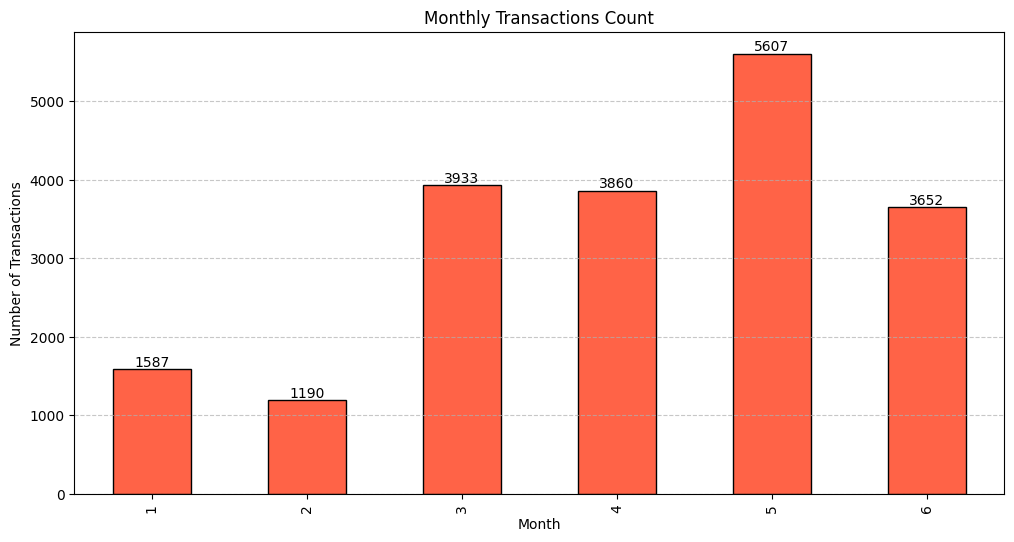

In [ ]:
plt.figure(figsize = (12,6))
monthly_transactions = data.groupby('month')['Transaction Hash'].count()
monthly_transactions.plot(kind='bar', color='tomato', edgecolor = "k")
plt.title('Monthly Transactions Count')
plt.ylabel('Number of Transactions')
for i, count in enumerate(monthly_transactions):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Month')
plt.show()

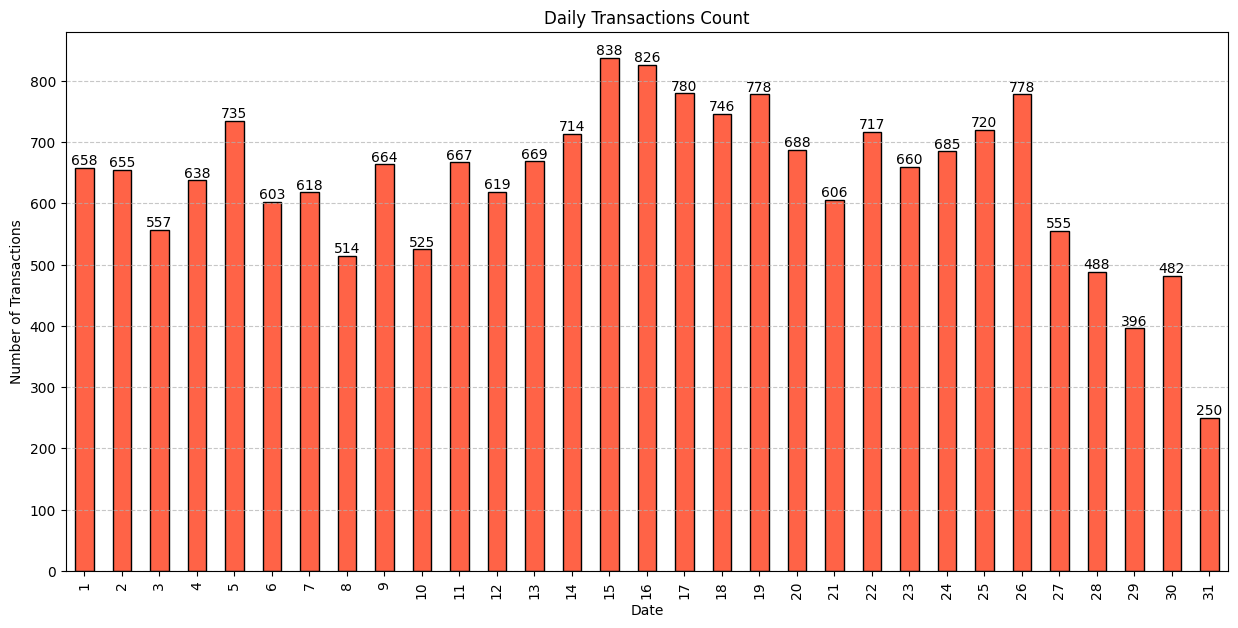

In [ ]:
plt.figure(figsize = (15,7))
daily_transactions = data.groupby('day')['Transaction Hash'].count()
daily_transactions.plot(kind='bar', color='tomato', edgecolor = "k")
plt.title('Daily Transactions Count')
plt.ylabel('Number of Transactions')
for i, count in enumerate(daily_transactions):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Date')
plt.show()

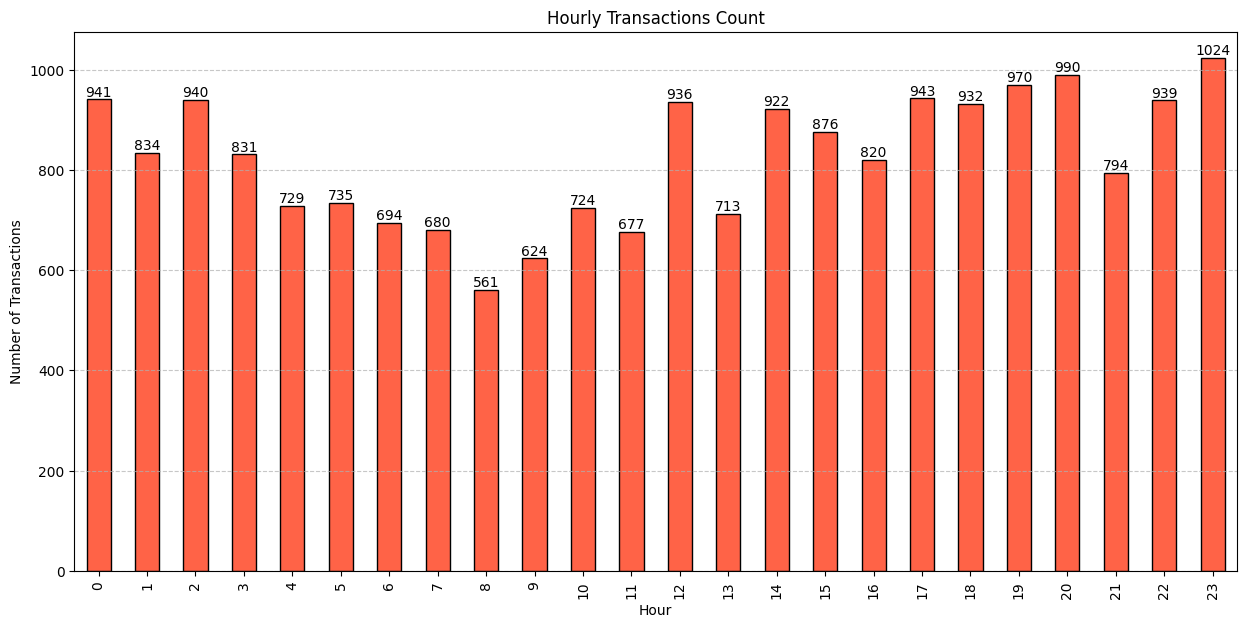

In [ ]:
plt.figure(figsize = (15,7))
hourly_transactions = data.groupby('hour')['Transaction Hash'].count()
hourly_transactions.plot(kind='bar', color='tomato', edgecolor = "k")
plt.title('Hourly Transactions Count')
plt.ylabel('Number of Transactions')
plt.xlabel('Hour')
for i, count in enumerate(hourly_transactions):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Weekend vs. Weekday transactions

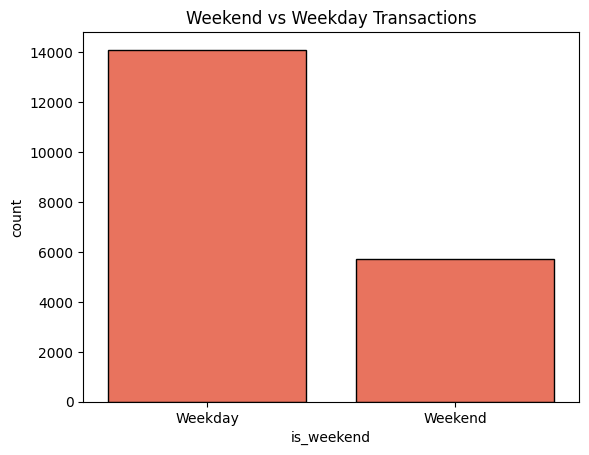

In [ ]:
sns.countplot(data=data, x='is_weekend' , color = "tomato" , edgecolor = "k")
plt.title('Weekend vs Weekday Transactions')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.show()

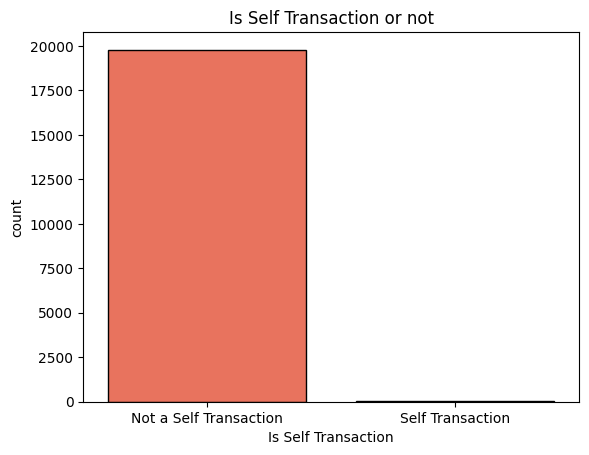

In [ ]:
sns.countplot(data=data, x='Is Self Transaction' , color = "tomato" , edgecolor = "k")
plt.title('Is Self Transaction or not')
plt.xticks([0, 1], ['Not a Self Transaction', 'Self Transaction'])
plt.show()

In [ ]:
## Analysis
## Year column is not important (2024 year data only)
##  "is slef transaction" column contain mostly 1 type of value
## people generally do transaction in weekdays

In [ ]:
#data.to_csv("processed_near_token_data.csv", index=False)
#this processed dataset in Group2 folder